Title- Plant leaf disease detection using deep learning (Convolutional Neural Network)

In [ ]:

import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Importing the required dependencies

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image



import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails = json.load(open("/content/kaggle (1).json"))

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

100% 2.04G/2.04G [00:16<00:00, 175MB/s]
100% 2.04G/2.04G [00:16<00:00, 129MB/s]


In [ ]:
!ls

 drive	'kaggle (1).json'   plantvillage-dataset.zip   sample_data


In [ ]:
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'grayscale', 'color']
38
['Tomato___Late_blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___Late_blight', 'Tomato___healthy', 'Apple___Apple_scab']
38
['Tomato___Late_blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___Late_blight', 'Tomato___healthy', 'Apple___Apple_scab']
38
['Tomato___Late_blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Potato___Late_blight', 'Tomato___healthy', 'Apple___Apple_scab']


In [ ]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['2c4e117b-0a0f-43d0-93b5-88b2e77d272a___Mt.N.V_HL 6151.JPG', '25014ae7-b016-430a-b6a6-aa77dc3c4a8a___Mt.N.V_HL 8986.JPG', '5d03624b-61fe-4764-944e-c2a347e99889___Mt.N.V_HL 6192.JPG', '7664a68e-5bf7-4ca4-988d-12d9360bb512___Mt.N.V_HL 9095.JPG', '56eda055-bb22-4adf-b829-549c03804b9d___Mt.N.V_HL 6155.JPG']


Data preprocessing



In [ ]:
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


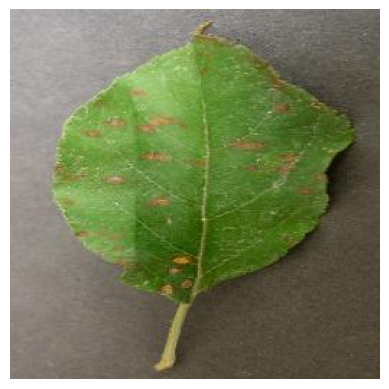

In [ ]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()



(256, 256, 3)


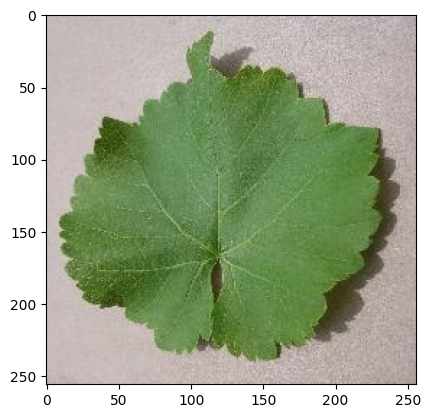

In [ ]:
image_path = '/content/plantvillage dataset/color/Grape___healthy/0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('on')  # Turn off axis numbers
plt.show()


(256, 256, 3)


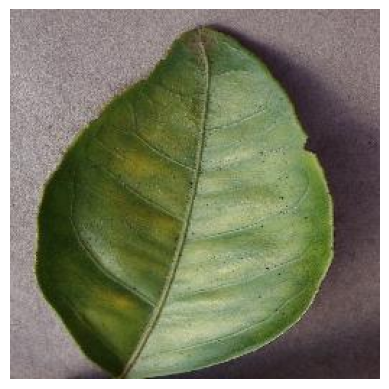

In [ ]:
image_path = '/content/plantvillage dataset/color/Orange___Haunglongbing_(Citrus_greening)/005e7424-a343-443e-b165-332cb5bed323___CREC_HLB 7153.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()


(256, 256, 3)


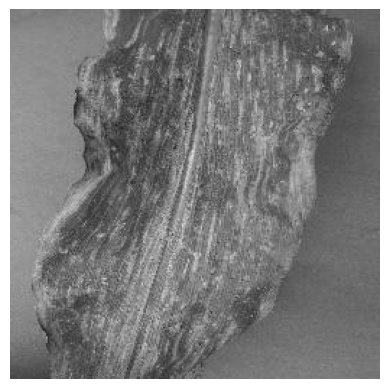

In [ ]:
image_path = '/content/plantvillage dataset/grayscale/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/00a20f6f-e8bd-4453-9e25-36ea70feb626___RS_GLSp 4655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()


(256, 256, 3)


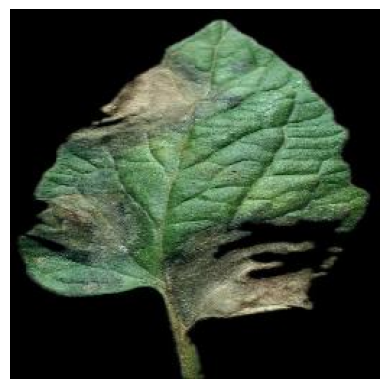

In [ ]:
image_path = '/content/plantvillage dataset/segmented/Tomato___Late_blight/00355ec2-f12c-4015-b8f9-94354f69ce22___RS_Late.B 5311_final_masked.jpg'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/plantvillage dataset/color/Cherry_(including_sour)___Powdery_mildew/00705aa7-5ea2-4419-9440-8ba65e108eb9___FREC_Pwd.M 0267.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)


[[[136 130 130]
  [137 131 131]
  [139 133 133]
  ...
  [130 125 131]
  [128 123 129]
  [125 120 126]]

 [[139 133 133]
  [140 134 134]
  [142 136 136]
  ...
  [130 125 131]
  [131 126 132]
  [130 125 131]]

 [[140 134 134]
  [141 135 135]
  [142 136 136]
  ...
  [122 117 123]
  [124 119 125]
  [124 119 125]]

 ...

 [[150 144 144]
  [150 144 144]
  [149 143 143]
  ...
  [148 144 145]
  [148 144 145]
  [147 143 144]]

 [[153 147 147]
  [152 146 146]
  [151 145 145]
  ...
  [148 144 145]
  [147 143 144]
  [146 142 143]]

 [[156 150 150]
  [155 149 149]
  [153 147 147]
  ...
  [148 144 145]
  [147 143 144]
  [146 142 143]]]


In [ ]:
img_size = 224
batch_size = 32


Splitting data into train-test split


In [ ]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


Building a Convolution Neural Network (CNN)

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Training the model


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)


Epoch 1/5
1358/1358 [==============================] - 122s 85ms/step - loss: 0.9715 - accuracy: 0.7347 - val_loss: 0.4436 - val_accuracy: 0.8594
Epoch 2/5
1358/1358 [==============================] - 100s 74ms/step - loss: 0.2751 - accuracy: 0.9138 - val_loss: 0.3759 - val_accuracy: 0.8823
Epoch 3/5
1358/1358 [==============================] - 103s 76ms/step - loss: 0.1349 - accuracy: 0.9559 - val_loss: 0.4554 - val_accuracy: 0.8801
Epoch 4/5
1358/1358 [==============================] - 102s 75ms/step - loss: 0.0896 - accuracy: 0.9701 - val_loss: 0.5277 - val_accuracy: 0.8772
Epoch 5/5
1358/1358 [==============================] - 104s 77ms/step - loss: 0.0706 - accuracy: 0.9764 - val_loss: 0.7176 - val_accuracy: 0.8615


In [ ]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 [==============================] - 19s 54ms/step - loss: 0.7176 - accuracy: 0.8615
Validation Accuracy: 86.15%


Evaluating the model


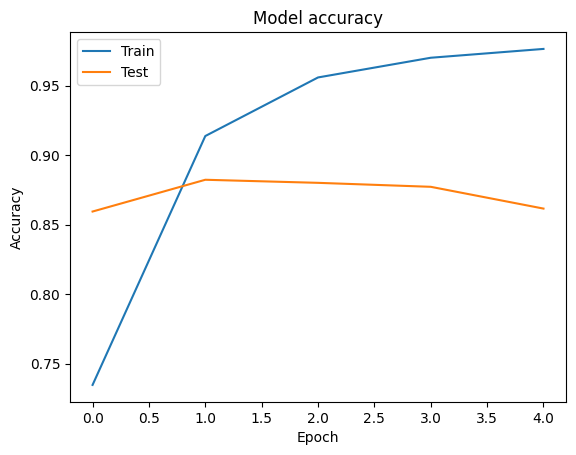

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

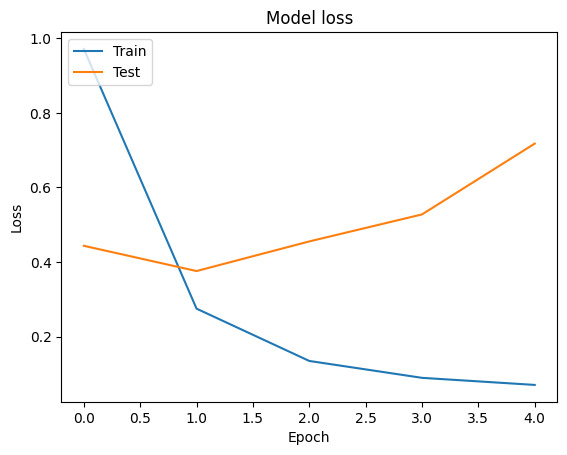

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Building a predictive system


In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

Predicting the plant disease





Corn maize healthy

In [ ]:
image_path='/content/plantvillage dataset/color/Corn_(maize)___healthy/026bd735-b9f4-4eab-86f3-23df15dbec95___R.S_HL 7938 copy.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 341ms/step
Predicted Class Name: Corn_(maize)___healthy


Tomato septoria leaf spot

1/1 [==============================] - 0s 19ms/step
Predicted Class Name: Tomato___Septoria_leaf_spot
(256, 256, 3)


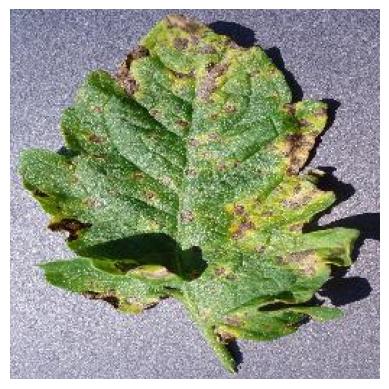

In [ ]:
image_path='/content/plantvillage dataset/color/Tomato___Septoria_leaf_spot/009ce7ca-77de-4e4e-9f59-bec9162df779___Matt.S_CG 7403.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)
print("Predicted Class Name:", predicted_class_name)
img = mpimg.imread(image_path)

print(img.shape)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

apple black rot(grayscale)

1/1 [==============================] - 0s 18ms/step
Predicted Class Name: Apple___Black_rot
(256, 256, 3)


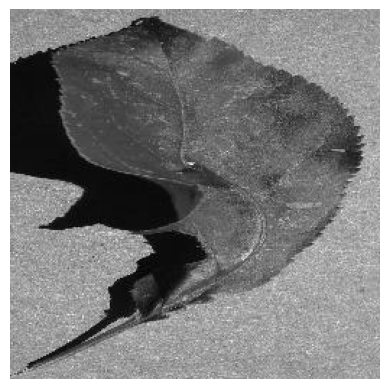

In [ ]:
image_path='/content/plantvillage dataset/grayscale/Apple___Black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)
print("Predicted Class Name:", predicted_class_name)
img = mpimg.imread(image_path)

print(img.shape)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

Raspberry healthy(segmented) [Not predicting segmented images]


1/1 [==============================] - 0s 18ms/step
Predicted Class Name: Tomato___Late_blight
(256, 256, 3)


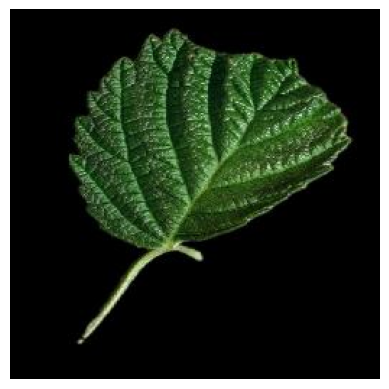

In [ ]:
image_path='/content/plantvillage dataset/segmented/Raspberry___healthy/04908211-66c9-42f8-a9b1-9d29a686f131___Mary_HL 9175_final_masked.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)
print("Predicted Class Name:", predicted_class_name)
img = mpimg.imread(image_path)

print(img.shape)
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

Saving the model


In [ ]:
model.save('/content/drive/MyDrive/Trained_models/plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
